# https://github.com/must4in3/pix2pix

In [1]:
import tensorflow as tf
import datetime
from src.Image_processing_functions import load, resize, random_crop, normalize, random_jitter 
from src.Image_processing_functions import load_image_train, load_image_test
from src.Image_processing_functions import BUFFER_SIZE, BATCH_SIZE, IMG_WIDTH, IMG_HEIGHT
import os
from IPython import display
from src.discriminator_functions import Discriminator
from src.generator_functions import downsample, upsample, Generator
from src.training_and_generate_images_functions import generate_images, train_step, fit

In [2]:
inp, re = load('imagenes/all_photo/1000_with_mask/1.png')

In [3]:
discriminator = Discriminator()

# Generate Images
Write a function to plot some images during training.

We pass images from the test dataset to the generator.
The generator will then translate the input image into the output.
Last step is to plot the predictions and voila!

*Note: The training=True is intentional here since we want the batch statistics while running the model on the test dataset. If we use training=False, we will get the accumulated statistics learned from the training dataset (which we don't want)*

In [4]:
# Call the load_image_train function that automate the whole process of loading test images.
# Input images 512 pixel 256*2
# Separate real image from input image
# Resize las dos imagenes con el metodo de los NEAREST_NEIGHBOR
# Appy a random_jitter
# Finally normalizing the images to [-1, 1]
train_dataset = tf.data.Dataset.list_files('imagenes/Barocco/with_mask/*.png')
train_dataset = train_dataset.map(load_image_train,
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.batch(BATCH_SIZE)

In [5]:
test_dataset = tf.data.Dataset.list_files('imagenes/Barocco/with_mask_test/*.png')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

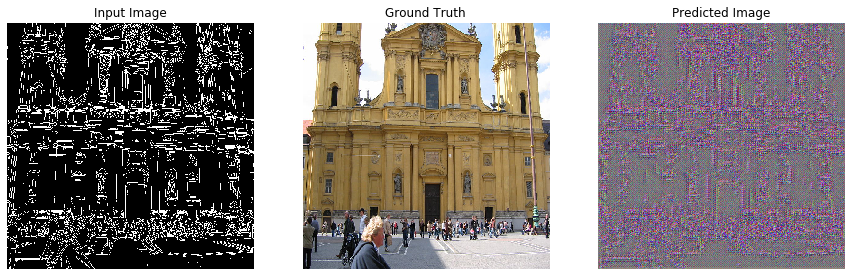

In [6]:
generator = Generator()
for example_input, example_target in test_dataset.take(1):
    generate_images(generator, example_input, example_target)

# Checkpoint

In [7]:
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of 
# first-order and second-order moments. According to the paper Adam: A Method for Stochastic Optimization. 
# Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant 
# to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [8]:
checkpoint_dir = './training_checkpoints'

In [9]:
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

# Training
For each example input generate an output.<br>
The discriminator receives the input_image and the generated image as the first input. The second input is the input_image and the target_image.<br>
Next, we calculate the generator and the discriminator loss.<br>
Then, we calculate the gradients of loss with respect to both the generator and the discriminator variables(inputs) and apply those to the optimizer.<br>
Then log the losses to TensorBoard.<br>

In [10]:
EPOCHS = 100

In [11]:
# create a folder with datetime and the training file
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [12]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

Reusing TensorBoard on port 6006 (pid 6108), started 5:44:26 ago. (Use '!kill 6108' to kill it.)

In [13]:
# Computes the cross-entropy loss between true labels and predicted labels.
#loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [14]:
# Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of 
# first-order and second-order moments. According to the paper Adam: A Method for Stochastic Optimization. 
# Kingma et al., 2014, the method is "computationally efficient, has little memory requirement, invariant 
# to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters".
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

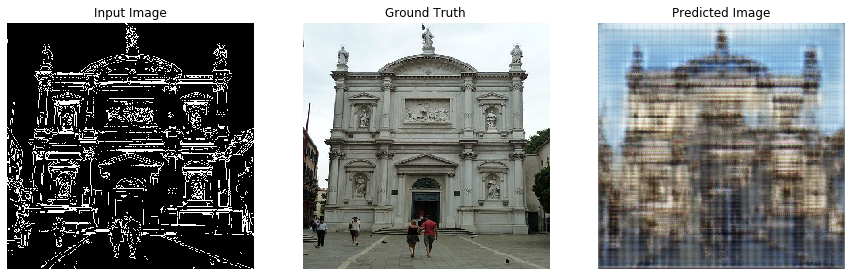

Epoch:  6
...................................................................

KeyboardInterrupt: 

In [15]:
# training loop
fit(train_dataset, EPOCHS, test_dataset, generator, discriminator, 
    generator_optimizer, discriminator_optimizer, summary_writer)

In [16]:
ls {training_checkpoints}

ls: cannot access '{training_checkpoints}': No such file or directory


In [17]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

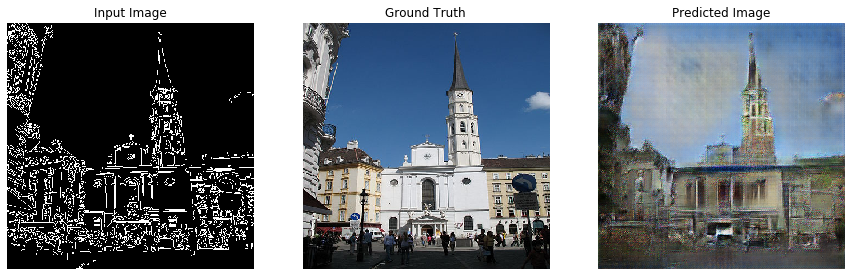

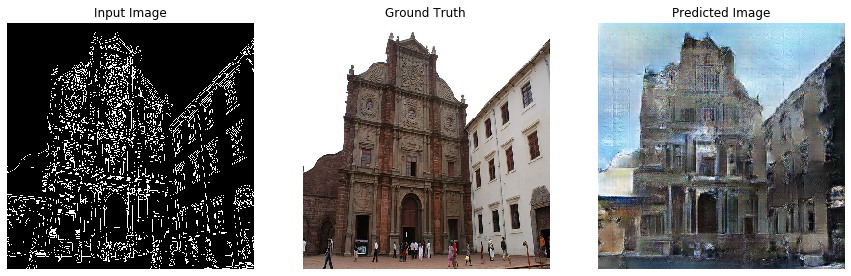

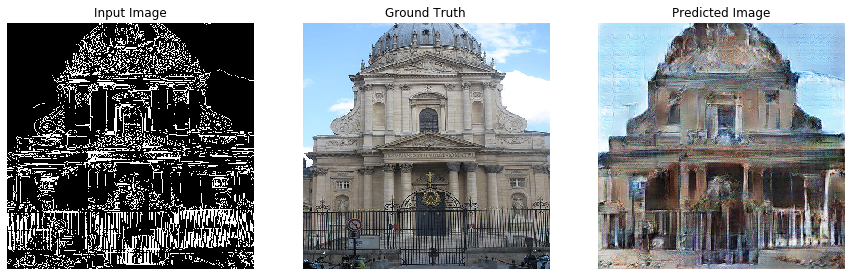

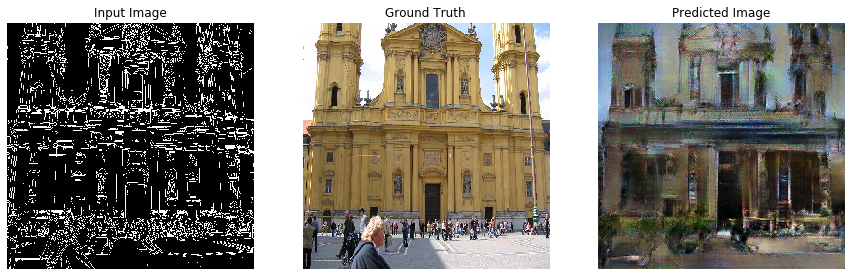

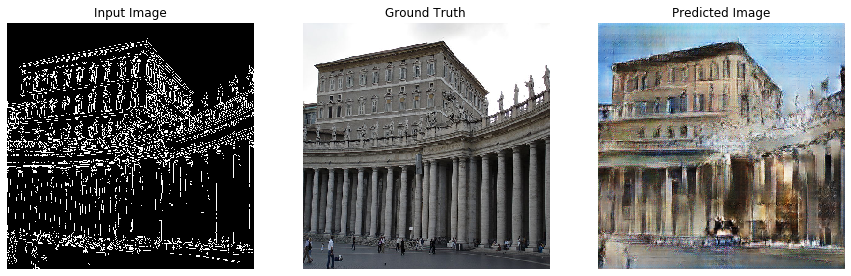

In [18]:
# Run the trained model on a few examples from the test dataset
for inp, tar in test_dataset.take(5):
    generate_images(generator, inp, tar)

In [19]:
test_dataset = tf.data.Dataset.list_files('imagenes/disegni/draw/*.png')
test_dataset = test_dataset.map(load_image_test)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [ ]:
for inp, tar in test_dataset.take(6):
    generate_images(generator, inp, tar)